# Exploring Expected Value

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gameResult(cons,prob,nPlays):
    '''
    Parameters:
        cons: a list of values 
        prob: a list of probability (0-1) for each value in 'cons'
        nPlays: number of games 
    '''
    # A LIST OF VALUES REPRESENTING THE OUTCOME OF EACH GAME
    results = np.random.choice( cons , size = nPlays , p = prob)
    # A LIST OF CUMULATED VALUES BASED ON THE 'results'
    cumResult = np.cumsum(results)
    
    return cumResult

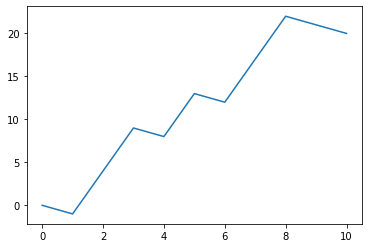

In [3]:
consequence = [ 5 , -1] # VALUE EARNED PER GAME OUTCOME
probability = [ 0.5, 0.5] # PROBABILITY 
nGames = 10 # NUMBER OF GAMES PLAYED 

# THE FIRST VALUE IS ZERO, TO REPRESENT THE INTIALIZATION OF THE GAME
results = np.zeros(nGames + 1 )
results[1:] = gameResult(cons = consequence,
                     prob = probability,
                     nPlays = nGames)


plt.figure(1)

x = np.arange(nGames + 1)
plt.plot(x, results)
plt.show()

It's observed,that as the player plays more games, the cumulative value increases. Does this fact stay true as more games are played?

### Playing many many games

The upper and lower bound will be displayed to see where the accumulated earnings are heading in respect to these two bounds.

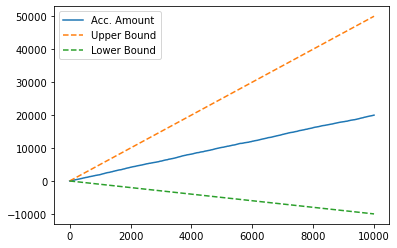

In [4]:
consequence = [ 5 , -1] # VALUE EARNED PER GAME OUTCOME
probability = [ 0.5, 0.5] # PROBABILITY 
nGames = 10000 # NUMBER OF GAMES PLAYED 

# THE FIRST VALUE IS ZERO, TO REPRESENT THE INTIALIZATION OF THE GAME
results = np.zeros(nGames + 1 )
results[1:] = gameResult(cons = consequence,
                     prob = probability,
                     nPlays = nGames)


x = np.arange(nGames+1)

# UPPER BOUND
maxVal = np.ones(nGames+1)* consequence[0]
maxVal[0] = 0
maxAcc = np.cumsum(maxVal)

# LOWER BOUND
minVal = np.ones(nGames+1)* consequence[1]
minVal[0] = 0
minAcc = np.cumsum(minVal)

# GAME PLAY 
plt.plot(x, results,label='Acc. Amount')

# BOUNDS
plt.plot(x,maxAcc,label='Upper Bound',linestyle='dashed')
plt.plot(x,minAcc,label='Lower Bound',linestyle='dashed')

plt.legend()

As the number of games increase, there is a clear pattern occuring with the accumulative amount earned from the games played. The rate of change is becoming consistent. What can this tell us about the expected earnings per game?

In [5]:
 m,b = np.polyfit(x,results,1)
    
print('Slope:',m)

Slope: 2.0002093222711332


The slope tells me that for every game, I can expect to increase the earnings by about $2.

This fact concurs with the theoretical formula for expected value: $E(x)= \sum_i x_i \cdot p_i$

$E(x)= (\$5) \cdot (0.5)+(-\$1) \cdot (0.5) = \$2$